In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from cv2 import bitwise_and, resize
from skimage import io
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist
from skimage.filters import frangi

In [2]:
def contrast_stretching(img):
    p1, p99 = np.percentile(img, (1, 96))
    img = rescale_intensity(img, in_range=(p1, p99))
    return img

In [3]:
def get_blood_vessels(image, mask):

    image = np.array(image)
    mask = np.asarray(mask)
    mask = mask[:, :, 1]

    # r=0 g b=0
    image[:, :, [0, 2]] = 0
    green = image[:, :, 1]

    green = contrast_stretching(green)
    # green = equalize_hist(green)

    green = frangi(green)

    # green = contrast_stretching(green)
    green = equalize_hist(green)

    green = np.asarray(green)
    # p = 0.06  # for contrast_stretching
    p = 0.92  # for equalize_hist

    green[green > p] = 1
    green[green <= p] = 0

    res = bitwise_and(green, green, mask=mask)

    return res


In [4]:
def statistics(tp, fp, fn, tn):
    positive = tp + fn
    negative = fp + tn
    predicted_positive = tp + fp
    predicted_negative = fn + tn
    
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    sensitivity = tp/(tp+fn)
    specificity = tn/(fp+tn)
    gmean = math.sqrt(sensitivity*specificity)
        
    print("tp:", tp, "| fp:", fp, "| fn:", fn, "| tn:", tn)
    
    print("Accuracy =", accuracy)
    print("Sensitivity =", sensitivity)
    print("Specificity =", specificity)    
    print("G-mean = ", gmean)
    
    

In [5]:
def confusion_matrix(img, model):
    tp, fp, fn, tn = 0, 0, 0, 0
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):
            pixel_model = model[i][j]
            # black
            if pixel == 0 and pixel == pixel_model: 
                tn += 1
            elif pixel == 0:
                fn += 1
            # white
            elif pixel == pixel_model/255:
                tp += 1
            else:
                fp += 1
                
    statistics(tp, fp, fn, tn)

-------------
image 01_dr
tp: 320422 | fp: 253866 | fn: 95860 | tn: 7515196
Accuracy = 0.9572741231156565
Sensitivity = 0.7697234086508665
Specificity = 0.9673234683929669
G-mean =  0.862885576052476
-------------
image 02_dr
tp: 374625 | fp: 204664 | fn: 147253 | tn: 7458802
Accuracy = 0.9570064495762182
Sensitivity = 0.7178401848707936
Specificity = 0.9732935462883243
G-mean =  0.8358643545463349
-------------
image 03_dr
tp: 346299 | fp: 240905 | fn: 148101 | tn: 7450039
Accuracy = 0.9524753021986614
Sensitivity = 0.7004429611650486
Specificity = 0.9686767970225761
G-mean =  0.8237128408118741
-------------
image 04_dr
tp: 324584 | fp: 266944 | fn: 137595 | tn: 7456221
Accuracy = 0.9505776421858385
Sensitivity = 0.7022906709305269
Specificity = 0.9654359320304564
G-mean =  0.8234176634285347
-------------
image 05_dr
tp: 393637 | fp: 184046 | fn: 115341 | tn: 7492320
Accuracy = 0.9634240173656721
Sensitivity = 0.7733870619162322
Specificity = 0.9760243323468423
G-mean =  0.868817927

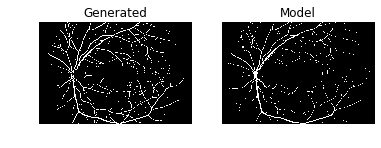

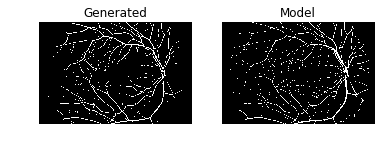

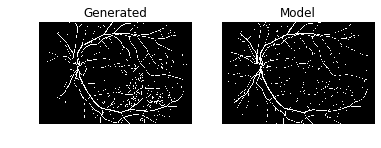

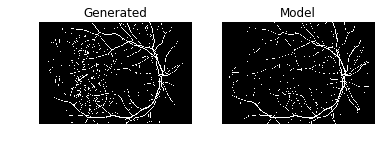

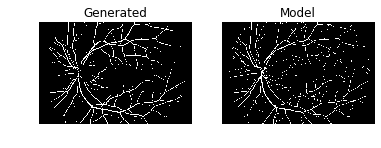

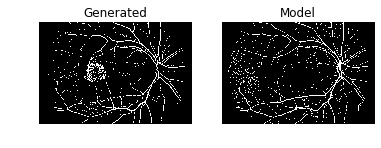

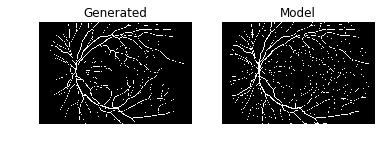

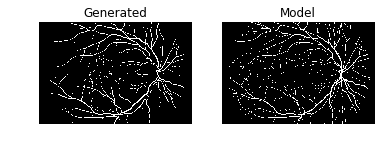

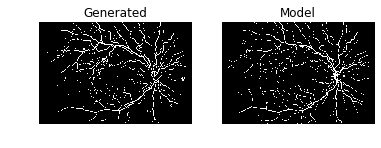

In [7]:
for number in range(1, 10):
    number = str(number)
    print('-------------')
    print('image 0' + number + '_dr')
    img = io.imread('images/0'+number+'_dr.JPG')
    mask = io.imread('mask/0'+number+'_dr_mask.tif')

    img = get_blood_vessels(img, mask) 
    
    model = io.imread('manual1/0'+number+'_dr.tif')
    confusion_matrix(img, model)
    
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     ax1.imshow(img, cmap="gray")
#     ax1.set_title('Generated')
#     ax1.axis('off')
#     ax2.imshow(model, cmap="gray")
#     ax2.set_title('Model')
#     ax2.axis('off')
#     plt.savefig('result/0'+number+'_dr.png')
